[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/NakuRei/coding-algorithm-in-python/blob/machine-learning/src/machine-learning/regression/simple_linear_regression/simple_linear_regression.ipynb)

# 単回帰分析（Simple Linear Regression）

単回帰分析とは、説明変数が1つの回帰分析である。
すなわち、データを`y = ax + b`のような直線で近似する手法である。
ここで、`x`は説明変数（独立変数）、`y`は目的変数（従属変数）と呼ばれる。

`a`および`b`はパラメータであり、これらの値を最適化する。
最適化のアルゴリズムは、最小二乗法（Ordinary Least Squares）を用いる。
最小二乗法では、実測値と予測値の差（残差）の二乗和が最小となるように、パラメータを最適化する。

Pythonでは、`sklearn`を用いると簡単に単回帰分析を実行できる。

## パッケージの読み込み

In [1]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import sklearn.linear_model
import sklearn.metrics
import sklearn.model_selection


plt.style.use('../../../../nakurei_line_graph.mplstyle')

## データセットの読み込み

In [2]:
dataset_csv_filepath = "temperature_power_consumption.csv"
dataset_df = pd.read_csv(dataset_csv_filepath)  # type: ignore
assert isinstance(dataset_df, pd.DataFrame)
print(dataset_df.head())

           日付  最高気温(℃)  電力消費量(MWh)
0  2023-07-01     28.5       42500
1  2023-07-02     29.2       43200
2  2023-07-03     30.1       44800
3  2023-07-04     31.5       46700
4  2023-07-05     32.8       48900


## データを使えるように変形

`sklearn.linear_model.LinearRegression`の入力には2次元の配列を渡す必要がある。
そのため、データを`numpy.ndarray`に変換し、`reshape(-1, 1)`する。
これにより2次元のデータにできる。

In [3]:
temperatures: npt.NDArray[np.float64] = (
    dataset_df.iloc[:, 1].to_numpy().reshape(-1, 1)  # type: ignore
)
power_consumption: npt.NDArray[np.float64] = (
    dataset_df.iloc[:, 2].to_numpy().reshape(-1, 1)  # type: ignore
)

print("気温データ（最初の5行）:")
print(temperatures[:5])
print()  # 改行
print("電力消費量データ（最初の5行）:")
print(power_consumption[:5])

気温データ（最初の5行）:
[[28.5]
 [29.2]
 [30.1]
 [31.5]
 [32.8]]

電力消費量データ（最初の5行）:
[[42500]
 [43200]
 [44800]
 [46700]
 [48900]]


## データをプロットしてみる

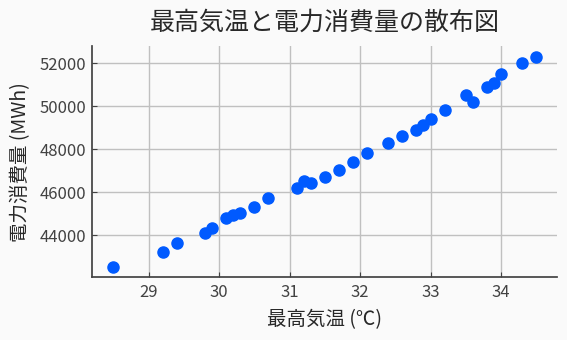

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))  # type: ignore
ax.scatter(temperatures, power_consumption)
ax.set_title("最高気温と電力消費量の散布図")
ax.set_xlabel("最高気温 (℃)")
ax.set_ylabel("電力消費量 (MWh)")
ax.grid(True)
plt.show()  # type: ignore

説明変数`x`（最高気温）と目的変数`y`（電力消費量）の相関係数を計算すると、相関の度合いがわかる。

In [5]:
correlation = np.corrcoef(temperatures.flatten(), power_consumption.flatten())[0, 1]
print(f"相関係数: {correlation:.4f}")

相関係数: 0.9971


## 訓練データとテストデータに分割

In [6]:
x_data = temperatures
y_data = power_consumption
test_size = 0.25

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(  # type: ignore
    x_data, y_data, test_size=test_size, random_state=0
)
assert isinstance(x_train, np.ndarray)
assert isinstance(x_test, np.ndarray)
assert isinstance(y_train, np.ndarray)
assert isinstance(y_test, np.ndarray)

## 単回帰分析の実行

単回帰分析は、`sklearn.linear_model.LinearRegression`を使えば簡単に実行できる。

### 学習

`LinearRegression`クラスをインスタンス化し、`fit`メソッドを実行すると学習される。

In [7]:
linear_regressor = sklearn.linear_model.LinearRegression()
linear_regressor.fit(x_train, y_train)  # type: ignore # 学習

LinearRegression()

### 推論

学習した`linear_regressor`の`predict`メソッドで推論できる。

In [8]:
y_pred: npt.NDArray[np.float64] = linear_regressor.predict(x_test)  # type: ignore
print(y_pred[:5])

[[44661.79205596]
 [51569.3402887 ]
 [49760.22051346]
 [44990.72292418]
 [49431.28964523]]


## 結果の確認

### 訓練データに対する結果の確認

もとの訓練データ`x_train`を青色、訓練データ`x_train`に対して推論した結果を赤色で表示する。
訓練データに対して学習しているので、この時点では当てはまりが良いはずである。

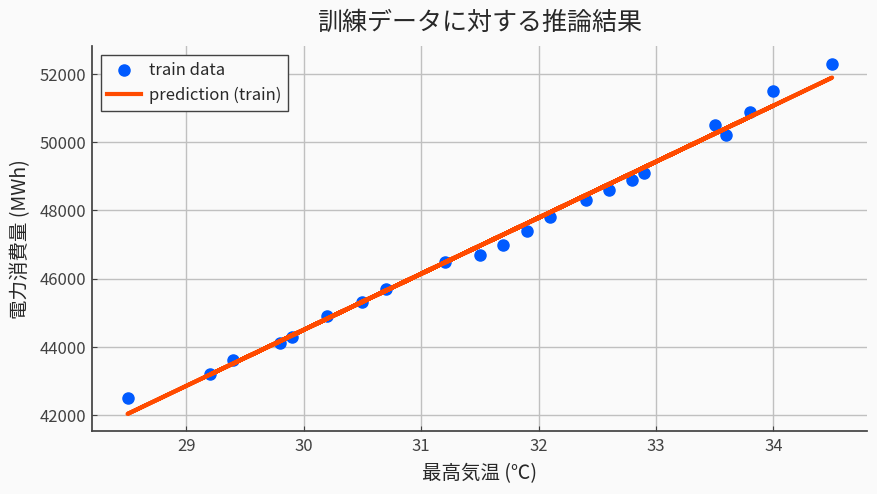

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))  # type: ignore
ax.scatter(x_train, y_train, label="train data", color="#005aff")
ax.plot(
    x_train,
    linear_regressor.predict(x_train),  # type: ignore
    label="prediction (train)",
    color="#ff4b00",
)
ax.set_title("訓練データに対する推論結果")
ax.set_xlabel("最高気温 (℃)")
ax.set_ylabel("電力消費量 (MWh)")
ax.grid(True)
ax.legend()
plt.show()  # type: ignore

### テストデータに対する結果の確認

テストデータ`x_test`をオレンジ色、テストデータ`x_test`に対して推論した結果を緑色で表示する。
テストデータに対しては学習していないため、テストデータに対する当てはまりの良さで、モデルの性能を測れる。モデルがうまく学習できていないと、当てはまりが悪くなる。

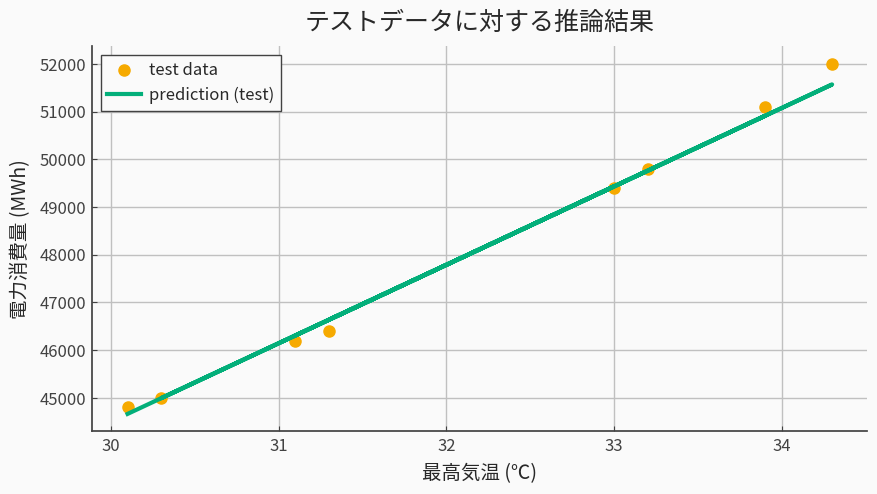

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))  # type: ignore
ax.scatter(x_test, y_test, label="test data", color="#f6aa00")
ax.plot(
    x_test,
    linear_regressor.predict(x_test),  # type: ignore
    label="prediction (test)",
    color="#03af7a",
)
ax.set_title("テストデータに対する推論結果")
ax.set_xlabel("最高気温 (℃)")
ax.set_ylabel("電力消費量 (MWh)")
ax.grid(True)
ax.legend()
plt.show()  # type: ignore

### 訓練データとテストデータ両方の結果をプロットする

今回は訓練データとテストデータが同様の傾向を示すため、よく一致することが見て取れる。

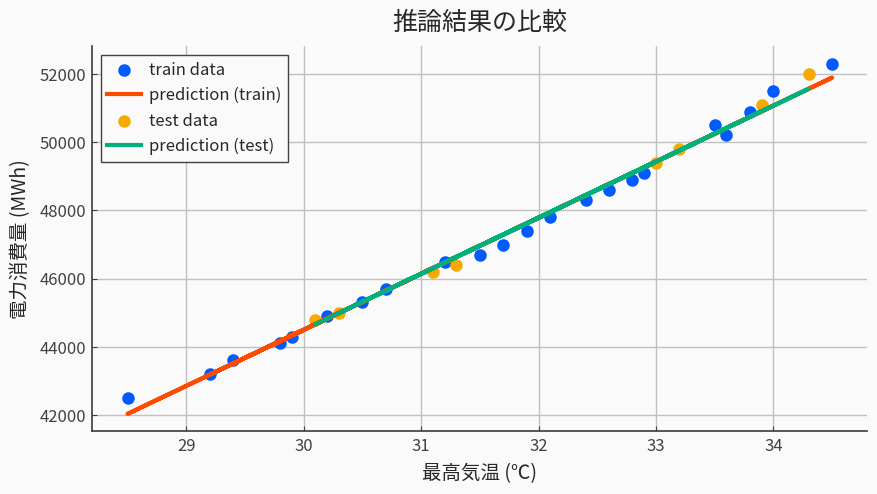

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))  # type: ignore
ax.scatter(x_train, y_train, label="train data", color="#005aff")
ax.plot(
    x_train,
    linear_regressor.predict(x_train),  # type: ignore
    label="prediction (train)",
    color="#ff4b00",
)
ax.scatter(x_test, y_test, label="test data", color="#f6aa00")
ax.plot(
    x_test,
    linear_regressor.predict(x_test),  # type: ignore
    label="prediction (test)",
    color="#03af7a",
)
ax.set_title("推論結果の比較")
ax.set_xlabel("最高気温 (℃)")
ax.set_ylabel("電力消費量 (MWh)")
ax.grid(True)
ax.legend()
plt.show()  # type: ignore

### 信頼区間と予測区間をプロットする

信頼区間は回帰線の不確実性を、予測区間は新しいデータポイントの予測の不確実性を示す。

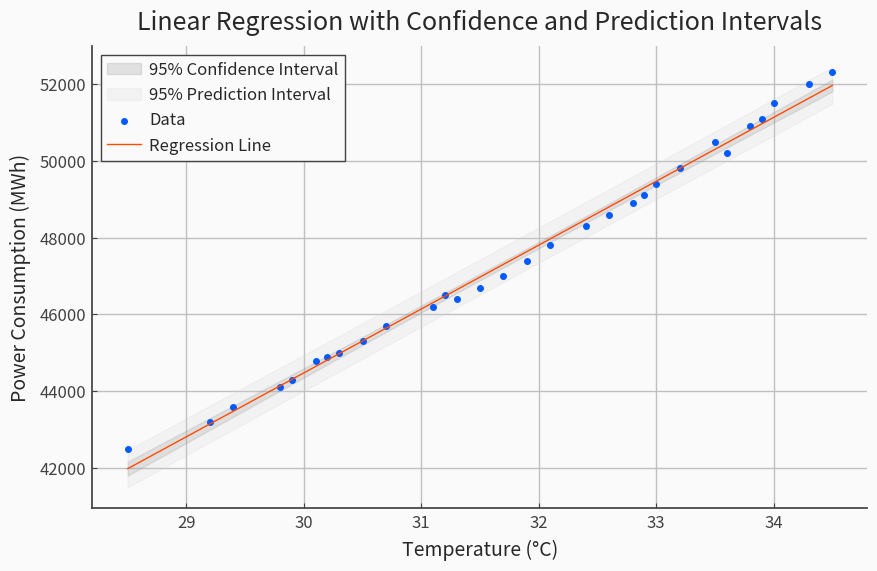

In [12]:
# 信頼区間と予測区間の計算
def predict_interval(
    x: npt.NDArray[np.float64],
    y: npt.NDArray[np.float64],
    x_pred: npt.NDArray[np.float64],
    alpha: float = 0.05,
):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # 回帰係数の計算
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    slope = numerator / denominator
    intercept = y_mean - slope * x_mean

    # 予測値
    y_pred = slope * x_pred + intercept

    # 標準誤差の計算
    se = np.sqrt(np.sum((y - (slope * x + intercept)) ** 2) / (n - 2))

    # 信頼区間
    ci = (
        scipy.stats.t.ppf(1 - alpha / 2, n - 2)
        * se
        * np.sqrt(1 / n + (x_pred - x_mean) ** 2 / np.sum((x - x_mean) ** 2))
    )

    # 予測区間
    pi = (
        scipy.stats.t.ppf(1 - alpha / 2, n - 2)
        * se
        * np.sqrt(
            1 + 1 / n + (x_pred - x_mean) ** 2 / np.sum((x - x_mean) ** 2)
        )
    )

    return y_pred, y_pred - ci, y_pred + ci, y_pred - pi, y_pred + pi


# データの準備
x_pred = np.linspace(temperatures.min(), temperatures.max(), 100).reshape(-1, 1)

# 区間の計算
y_pred, ci_lower, ci_upper, pi_lower, pi_upper = predict_interval(
    temperatures.flatten(), power_consumption.flatten(), x_pred.flatten()
)

# プロット
fig, ax = plt.subplots(figsize=(10, 6))
ax.fill_between(
    x_pred.flatten(),
    ci_lower,
    ci_upper,
    color="gray",
    alpha=0.2,
    label="95% Confidence Interval",
)
ax.fill_between(
    x_pred.flatten(),
    pi_lower,
    pi_upper,
    color="lightgray",
    alpha=0.2,
    label="95% Prediction Interval",
)
ax.scatter(temperatures, power_consumption, label="Data", marker=".")
ax.plot(x_pred, y_pred, color="#ff4b00", label="Regression Line", linewidth=1)

ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Power Consumption (MWh)")
ax.legend()
plt.title("Linear Regression with Confidence and Prediction Intervals")
plt.show()

### モデルの評価指標を計算

R-squared（決定係数）、Mean Squared Error (MSE)、Mean Absolute Error (MAE) などの評価指標を計算すると、数値的に評価できる。

In [13]:
y_pred: npt.NDArray[np.float64] = linear_regressor.predict(x_test)  # type: ignore

#### R-squared（決定係数）

- 0～1の値をとる。1が理想値。1に近いほど良い。
- データセットが小さい場合や説明変数が多い場合は、過大評価される傾向がある。
- 0.7以上あれば一般的に良いモデルとされる。

In [14]:
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

R-squared: 0.9945


#### Mean Squared Error (MSE)

- 平均二乗誤差
- 0以上の値をとる。単位は目的変数の二乗。0が理想値。0に近いほどモデルの予測が実際の値に近いことを表す。
- 外れ値に弱い。
  - 最大値を重視する。
- 他のモデルとの相対値で比較する。

In [15]:
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 38686.2956


#### Root MSE (RMSE)

- MSEの平方根を取ったもの。
  - 基本的にMSEと同じ性質を持つ。
- 単位は目的変数に同じ。
  - MSEの平方根を取ることで、単位をもとに戻している
    - 損失関数での利用など、単位を揃えたほうが評価しやすい場合がある

In [16]:
rmse = np.sqrt(mse)
print(f"Root MSE: {rmse:.4f}")

Root MSE: 196.6883


#### Mean Absolute Error (MAE)

- 0以上の値をとる。単位は目的変数に同じ。0が理想値。0に近いほどモデルの予測が実際の値に近いことを表す。
- MSEよりも外れ値の影響を受けにくい。
  - 平均的な誤差を重視する。
- 他のモデルとの相対値で比較する。

In [17]:
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")

Mean Absolute Error: 147.4449


評価指標は1つだけ見ても評価できないこともある。評価の例を以下に記す。

- R-squaredは高いがMSEやMAEが大きい場合、モデルはデータの全体的なトレンドを捉えているものの、個々の予測には大きな誤差のある可能性がある。
- R-squaredは中程度だがMSEやMAEが小さい場合、モデルは細かい変動を捉えきれていないが、全体的には良い予測をしている可能性がある。

### 回帰係数（傾き）と切片の表示

今回の場合、それぞれの値の意味は以下のようになる。

- 回帰係数（傾き）| 最高気温が1度上昇したときに、電力消費量がどの程度増加/減少するか
  - 傾きが正の場合は正の相関、負の場合は負の相関があることを表す
- 切片 | 最高気温が0度のときの予測電力消費量
  - 実際のデータ範囲外の値をとる場合は注意が必要である

In [18]:
print(f"Coefficient: {linear_regressor.coef_[0][0]:.4f}")
print(f"Intercept: {linear_regressor.intercept_[0]:.4f}")

Coefficient: 1644.6543
Intercept: -4842.3036


### 残差をプロット

予測値に対する残差をプロットする。残差のプロットからは以下のことが読み取れる。

- パターンの有無
  - 理想的には、残差にパターンは現れず、ランダムに散らばる。
  - もし、残差に何らかのパターンが存在する場合、モデルがとらえきれていない関係性が存在する可能性がある。
- 等分散性
  - 残差の散らばり方は、予測値に関わらず一定であるべきである。
  - 散らばり方が変化する場合、不均一分散の問題がある可能性がある。
- 外れ値
  - 他の点から大きく離れたデータは、外れ値である可能性が高い。
- 非線形性
 -残差がカーブを描いている場合、非線形の関係性が示唆される。

線形性や等分散性は線形回帰の主要な仮定である。とくに非線形性が見られる場合は、対数変換などの変換が必要になりうる。



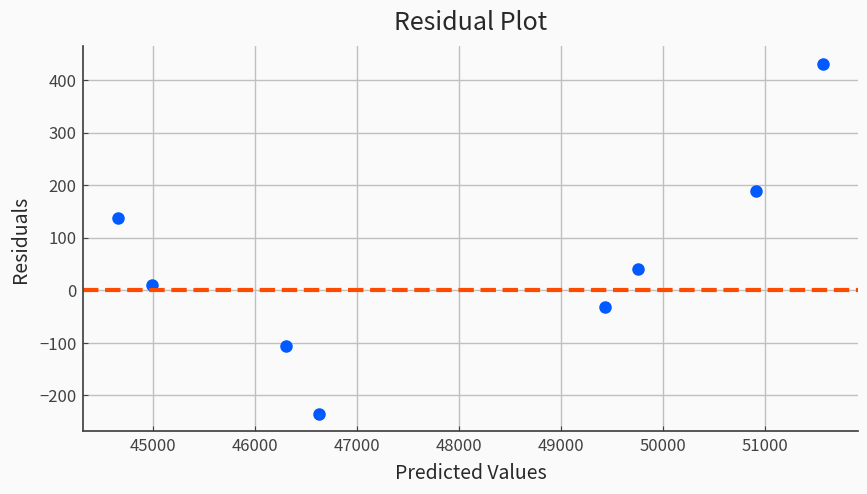

In [19]:
residuals: npt.NDArray[np.float64] = y_test - y_pred
fig, ax = plt.subplots(1, 1, figsize=(10, 5))  # type: ignore
ax.scatter(y_pred, residuals)
ax.set_title("Residual Plot")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Residuals")
ax.axhline(y=0, color="#ff4b00", linestyle="--")
plt.show()  # type: ignore

### QQ（Quantile-Quantile）プロット

QQプロットは、残差の分布が正規分布に従っているかを確認するためのグラフである。このグラフからは次のことを確認できる。

- 正規性の確認
  - 理想的には、点が直線上にきれいに並ぶ。
  - 点が直線から大きく外れる場合、残差が正規分布に従っていない可能性がある。
- 裾の挙動
  - グラフの両端が直線から外れる場合、外れ値が多いことを示唆する。
- S字カーブ
  - S字型のパターンが見られる場合、分布が歪んでいる可能性がある

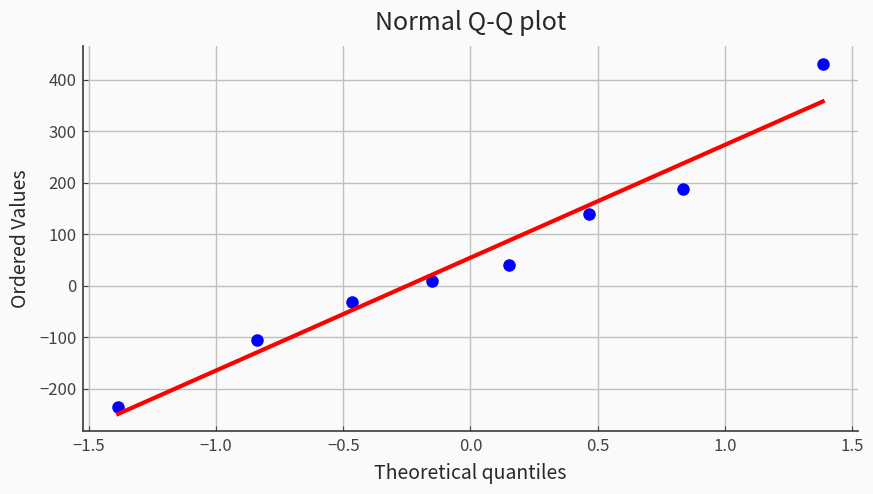

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))
scipy.stats.probplot(residuals.flatten(), dist="norm", plot=ax)
ax.set_title("Normal Q-Q plot")
plt.show()